In [1]:
import seaborn as sns
iris=sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


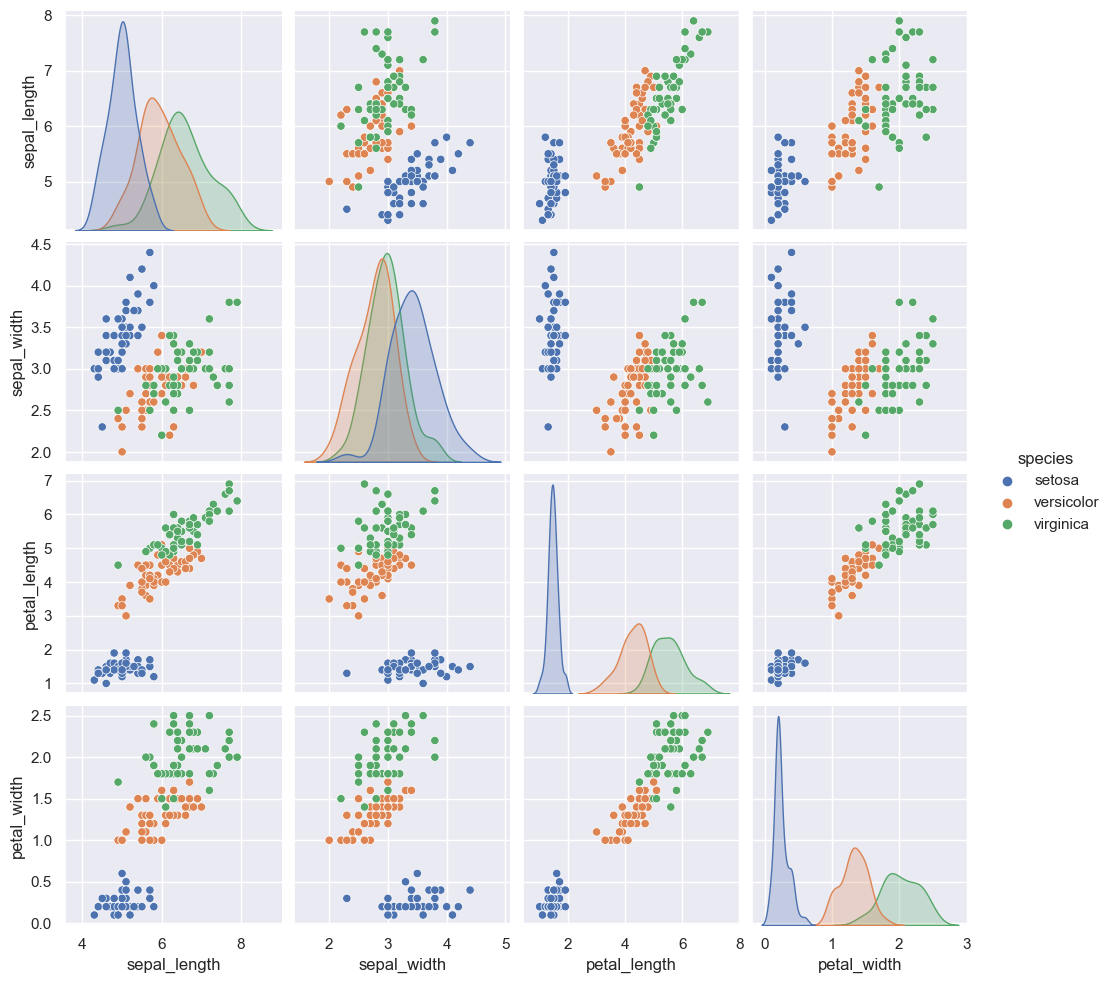

In [2]:
import seaborn as sns
sns.set() # seaborn style로 그림 그리기
sns.pairplot(iris, hue='species', height=2.5)

In [3]:
print(iris.shape) # iris data의 행과 열의 수
# 'species'열을  drop하고 input X를 정의함
X = iris.drop('species', axis=1)
print(X.shape)
# 'species'열을 label y를 정의함.
y=iris['species']

(150, 5)
(150, 4)


In [8]:
#LabelEncoder() method를 불러오기
from sklearn.preprocessing import LabelEncoder
import numpy as np # numpry 불러오기
classle=LabelEncoder()
# species 열의 문자열은 categorical 값으로 전환
y=classle.fit_transform(iris['species'].values)
# 중복되는 y값을 하나로 정리하여 print
print('species label:',np.unique(y))

species label: [0 1 2]


In [10]:
# 원래의 species 문자열로 전환
yo = classle.inverse_transform(y)
print('species:', np.unique(yo))

species: ['setosa' 'versicolor' 'virginica']


In [25]:
#Scikit-Learn 의 model_selection library를 train_test_splie로 명명
from sklearn.model_selection import train_test_split
# x와 y의 data를 각각 30%, 70%의 비율로 test_set과 training_set으로 나눔
X_train,X_test,y_train,y_test = train_test_split(X, y,
        test_size=0.3, random_state=1, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [26]:
# KNN 의 적용
from sklearn.neighbors import KNeighborsClassifier
#5개의 인접한이웃, 거리측정기준:유클리드
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, y_train) #모델 fitting과정

KNeighborsClassifier()

In [27]:
#train data의 y값 예측치
y_train_pred = knn.predict(X_train)
#모델을 적용한 test data의 y값 예측치
y_test_pred = knn.predict(X_test)
#학습데이터에서 오분류 갯수 확인
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum())
#시험데이터에서 오분류 갯수 확인
print('Misclassfied test samples: %d' %(y_test!=y_test_pred).sum())

Misclassified training samples: 2
Misclassfied test samples: 1


c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [28]:
#정확도 계산을 위한 모듈 import
from sklearn.metrics import accuracy_score
# 45개 test sample중 44개가 정확하게 분류됨: 44/45 = 0.9777...
print(accuracy_score(y_test, y_test_pred))

0.9777777777777777


In [29]:
# 오분류표 작성을 위한 모듈 import
from sklearn.metrics import confusion_matrix
# 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.
conf = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(conf)
# setosa와 versicolor는 모두 정확하게 분류되었고,
# virginica는 15개 중 1개가 versicolor로 오분류됨.

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [31]:
# 데이터를 표준화했을 경우 테스트
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train) # training data의 표준화
X_test_std = sc.transform(X_test) # test data의 표준화

#표준화된 data의 확인
print(X_train.head()) # X_train data 최초 5개의 관측치
X_train_std[1:5,] #X_train_std data 최초 5개의 관측치

     sepal_length  sepal_width  petal_length  petal_width
33            5.5          4.2           1.4          0.2
20            5.4          3.4           1.7          0.2
115           6.4          3.2           5.3          2.3
124           6.7          3.3           5.7          2.1
35            5.0          3.2           1.2          0.2


array([[-0.55053619,  0.76918392, -1.16537974, -1.30728421],
       [ 0.65376173,  0.30368356,  0.84243039,  1.44587881],
       [ 1.0150511 ,  0.53643374,  1.0655204 ,  1.18367281],
       [-1.03225536,  0.30368356, -1.44424226, -1.30728421]])

In [32]:
#KNN의 적용
from sklearn.neighbors import KNeighborsClassifier
#5개의 인접한이웃, 거리측정기준:유클리드
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [35]:
y_train_pred=knn.predict(X_train_std) #train data의 y값 예측치
y_test_pred=knn.predict(X_test_std) #모델을 적용한 test data의 y값 예측치
#표준화된 학습데이터 오분류 갯수 확인
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum())
#표준화된 학습데이터 오분류 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum())

Misclassified training samples: 4
Misclassified test samples: 3


c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [37]:
#정확도 계산을 위한 모듈 import
from sklearn.metrics import accuracy_score
# 45개 test sample중 42개가 정확하게 분류됨. 42/45 = 0.9333...
print(accuracy_score(y_test,y_test_pred))

0.9333333333333333


In [40]:
#오분류표 작성을 위한 import
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred)
print(conf)

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
